# DVIA ConvNet based on LeNet

Based on classing LeNet, we build a network with an extra conv layer and extra fully connected layer. Our own image dataset is used to train the network.

## Build the model with Caffe. 

In [5]:
from pylab import *
%pylab inline


import numpy as np
import os, sys

scriptpath = os.path.dirname(os.path.realpath( "__file__" ))
caffe_root = os.path.sep.join(scriptpath.split(os.path.sep)[:-2])

import caffe
from caffe import layers as L
from caffe import params as P

print "caffe_root = {}".format(caffe_root)

Populating the interactive namespace from numpy and matplotlib
caffe_root = /home/maheriya/Projects/dvcaffe


In [6]:
def cnn(lmdb, batch_size):
    n = caffe.NetSpec()
    ## Input LMDB data layer
    n.data, n.label = L.Data(batch_size=batch_size, source=lmdb, backend=P.Data.LMDB, 
                             transform_param=dict(scale=1./256), ntop=2)
    
#     n.conv1 = L.Convolution(n.data, kernel_size=4, num_output=64, weight_filler=dict(type='xavier'))
#     n.cccp1a = L.Convolution(n.conv1, kernel_size=1, num_output=42, weight_filler=dict(type='xavier'))
#     n.relu1a = L.ReLU(n.cccp1a, in_place=True)
#     n.cccp1b = L.Convolution(n.relu1a, kernel_size=1, num_output=32, weight_filler=dict(type='xavier'))
#     n.pool1 = L.Pooling(n.cccp1b, kernel_size=3, stride=2, pool=P.Pooling.MAX)
#     n.drop1 = L.Dropout(n.pool1, in_place=True)
#     n.relu1b = L.ReLU(n.drop1, in_place=True)
    
#     n.conv2 = L.Convolution(n.relu1b, kernel_size=4, num_output=42, weight_filler=dict(type='xavier'))
#     n.pool2 = L.Pooling(n.conv2, kernel_size=3, stride=2, pool=P.Pooling.MAX)
#     n.drop2 = L.Dropout(n.pool2, in_place=True)
#     n.relu2 = L.ReLU(n.drop2, in_place=True)
    
#     n.conv3 = L.Convolution(n.relu2, kernel_size=2, num_output=64, weight_filler=dict(type='xavier'))
#     n.pool3 = L.Pooling(n.conv3, kernel_size=2, stride=2, pool=P.Pooling.AVE)
#     n.relu3 = L.ReLU(n.pool3, in_place=True)

    # our version of LeNet: a series of linear and simple nonlinear transformations
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=40, weight_filler=dict(type='xavier'))
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.drop1 = L.Dropout(n.pool1, in_place=True)
    n.relu1 = L.ReLU(n.drop1, in_place=True)
    #
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=80, weight_filler=dict(type='xavier'))
    n.pool2 = L.Pooling(n.conv2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.drop2 = L.Dropout(n.pool2, in_place=True)
    n.relu2 = L.ReLU(n.drop2, in_place=True)
    #
    n.fc1 =   L.InnerProduct(n.relu2, num_output=768, weight_filler=dict(type='xavier'))
    n.relu_fc1 = L.ReLU(n.fc1, in_place=True)
  
    # Output 4-class classifier
    n.fc_class = L.InnerProduct(n.relu_fc1, num_output=4, weight_filler=dict(type='xavier'))
    n.accuracy_class = L.Accuracy(n.fc_class, n.label)
    n.loss_c = L.SoftmaxWithLoss(n.fc_class, n.label)

    return n.to_proto()

with open('dvia_train.prototxt', 'w') as f:
    trn_lmdb = os.path.join(caffe_root, 'data/dvia_cifar/dvia_train_NP_lmdb')
    f.write(str(cnn(trn_lmdb, 100)))

with open('dvia_test.prototxt', 'w') as f:
    val_lmdb = os.path.join(caffe_root, 'data/dvia_cifar/dvia_val_NP_lmdb')
    f.write(str(cnn(val_lmdb, 120)))

/usr/local/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/usr/local/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/usr/local/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
Drawing net to dvia_net.png


## Load and visualise the untrained network's internal structure and shape
Let's visualize the network. 

/usr/local/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/usr/local/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/usr/local/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
Drawing net to dvia_net.png


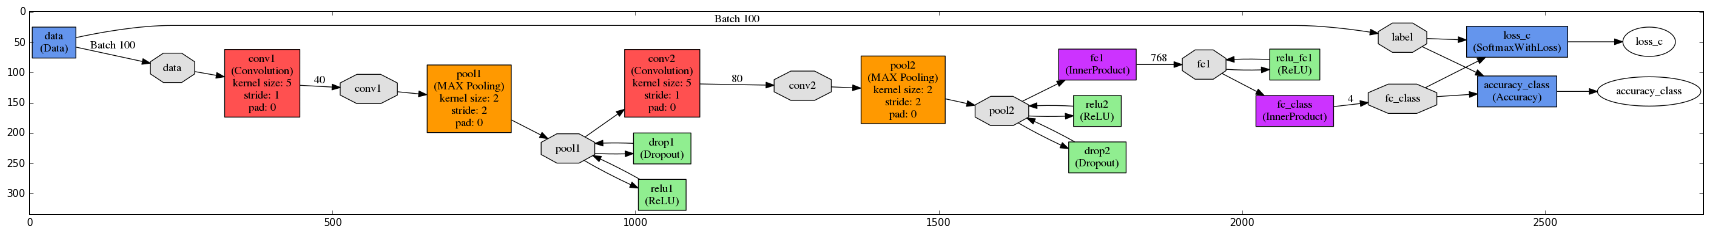

In [15]:
!python /usr/local/caffe/python/draw_net.py dvia_train.prototxt dvia_net.png
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
imshow(imread('dvia_net.png'))

In [16]:
caffe.set_mode_gpu()
solver = caffe.get_solver('dvia_solver.prototxt')

In [17]:
print("Layers' features:")
[(k, v.data.shape) for k, v in solver.net.blobs.items()]

Layers' features:


[('data', (100, 3, 32, 32)),
 ('label', (100,)),
 ('label_data_1_split_0', (100,)),
 ('label_data_1_split_1', (100,)),
 ('conv1', (100, 40, 28, 28)),
 ('pool1', (100, 40, 14, 14)),
 ('conv2', (100, 80, 10, 10)),
 ('pool2', (100, 80, 5, 5)),
 ('fc1', (100, 768)),
 ('fc_class', (100, 4)),
 ('fc_class_fc_class_0_split_0', (100, 4)),
 ('fc_class_fc_class_0_split_1', (100, 4)),
 ('accuracy_class', ()),
 ('loss_c', ())]

In [18]:
print("Parameters and shape:")
[(k, v[0].data.shape) for k, v in solver.net.params.items()]

Parameters and shape:


[('conv1', (40, 3, 5, 5)),
 ('conv2', (80, 40, 5, 5)),
 ('fc1', (768, 2000)),
 ('fc_class', (4, 768))]

## Solver's params

The solver's params for the created net are defined in a `.prototxt` file. 

Notice that because `max_iter: 150000`, the training will loop 3 times on the ~50000 training data. Because we train data by minibatches of 100 as defined above when creating the net, there will be a total of `150000*100/50000 = 300` epochs on some of those pre-shuffled 100 images minibatches.

We will test the net on `test_iter: 100` different test images at each `test_interval: 1000` images trained. 
____

Here, **RMSProp** is used, it is SDG-based, it converges faster than a pure SGD and it is robust.
____

In [20]:
!cat dvia_solver.prototxt

train_net: "dvia_train.prototxt"
test_net: "dvia_test.prototxt"

test_iter: 100
test_interval: 1000

base_lr: 0.0006
momentum: 0.0
weight_decay: 0.001

lr_policy: "inv"
gamma: 0.0001
power: 0.75

display: 100

max_iter: 150000

snapshot: 50000
snapshot_prefix: "cnn_snapshot"
solver_mode: GPU

type: "RMSProp"
rms_decay: 0.98


## Alternative way to train directly in Python
Since a recent update, there is no output in python by default, which is bad for debugging. 
Skip this cell and train with the second method shown below if needed. It is commented out in case you just chain some `shift+enter` ipython shortcuts. 

In [7]:
# %%time
# solver.solve()

## Train by calling caffe in command line
Just set the parameters correctly. Be sure that the notebook is at the root of the ipython notebook server. 
You can run this in an external terminal if you open it in the notebook's directory. 

It is also possible to finetune an existing net with a different solver or different data. Here I do it, because I feel the net could better fit the data. 

In [21]:
%%time
!caffe train -solver dvia_solver.prototxt #-weights cnn_pretrained.caffemodel

I0511 18:49:45.230723   556 caffe.cpp:185] Using GPUs 0
I0511 18:49:45.263825   556 caffe.cpp:190] GPU 0: GeForce GTX 470
I0511 18:49:45.401352   556 solver.cpp:48] Initializing solver from parameters: 
train_net: "dvia_train.prototxt"
test_net: "dvia_test.prototxt"
test_iter: 100
test_interval: 1000
base_lr: 0.0006
display: 100
max_iter: 150000
lr_policy: "inv"
gamma: 0.0001
power: 0.75
momentum: 0
weight_decay: 0.001
snapshot: 50000
snapshot_prefix: "cnn_snapshot"
solver_mode: GPU
device_id: 0
rms_decay: 0.98
type: "RMSProp"
I0511 18:49:45.401660   556 solver.cpp:81] Creating training net from train_net file: dvia_train.prototxt
I0511 18:49:45.402299   556 net.cpp:49] Initializing net from parameters: 
state {
  phase: TRAIN
}
layer {
  name: "data"
  type: "Data"
  top: "data"
  top: "label"
  transform_param {
    scale: 0.00390625
  }
  data_param {
    source: "/home/maheriya/Projects/dvcaffe/data/dvia_cifar/dvia_train_NP_lmdb"
    batch_size: 100
    backend: LMDB
  }
}
layer {


Caffe brewed. 
## Test the model completely on test data
Let's test directly in command-line:

In [11]:
%%time
!caffe test -model dvia_test.prototxt -weights cnn_snapshot_iter_150000.caffemodel -iterations 100

I0510 21:51:16.902950 23666 caffe.cpp:246] Use CPU.
I0510 21:51:17.130858 23666 net.cpp:49] Initializing net from parameters: 
state {
  phase: TEST
}
layer {
  name: "data"
  type: "Data"
  top: "data"
  top: "label"
  transform_param {
    scale: 0.00390625
  }
  data_param {
    source: "/home/maheriya/Projects/dvcaffe/data/dvia_cifar/dvia_val_NP_lmdb"
    batch_size: 120
    backend: LMDB
  }
}
layer {
  name: "conv1"
  type: "Convolution"
  bottom: "data"
  top: "conv1"
  convolution_param {
    num_output: 64
    kernel_size: 4
    weight_filler {
      type: "xavier"
    }
  }
}
layer {
  name: "cccp1a"
  type: "Convolution"
  bottom: "conv1"
  top: "cccp1a"
  convolution_param {
    num_output: 42
    kernel_size: 1
    weight_filler {
      type: "xavier"
    }
  }
}
layer {
  name: "relu1a"
  type: "ReLU"
  bottom: "cccp1a"
  top: "cccp1a"
}
layer {
  name: "cccp1b"
  type: "Convolution"
  bottom: "cccp1a"
  top: "cccp1b"
  convolution_param {
    num_output: 32
    kernel_si

## The model achieved near 58% accuracy on the 20 coarse labels and 47% accuracy on fine labels.
This means that upon showing the neural network a picture it had never seen, it will correctly classify it in one of the 20 coarse categories 58% of the time or it will classify it correctly in the fine categories 47% of the time right, and ignoring the coarse label. This is amazing, but the neural network for sure could be fine tuned with better solver parameters. 

It would  be also possible to have two more loss layers on top of the existing loss, to recombine the predictions made and synchronize with the fact that coarse and fine labels influence on each other and are related.

This neural network training could be compared to the results listed here: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#494c5356524332303132207461736b2031

Let's convert the notebook to github markdown:

In [13]:
!jupyter nbconvert --to markdown custom-cifar-100.ipynb 
!mv custom-cifar-100.md README.md

[NbConvertApp] Converting notebook custom-cifar-100.ipynb to markdown
[NbConvertApp] Writing 731885 bytes to custom-cifar-100.md
